In [208]:
import pandas as pd

AER_melted_master = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/AER_melted_master.xlsx')
QJE_melted_master = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/QJE_melted_master.xlsx')
RES_melted_master = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/RES_melted_master.xlsx')
JPE_melted_master = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/JPE_melted_master.xlsx')

In [209]:
print(AER_melted_master.shape ,QJE_melted_master.shape,RES_melted_master.shape,JPE_melted_master.shape)
melted_master = pd.concat([AER_melted_master,QJE_melted_master,RES_melted_master,JPE_melted_master ], axis=0)
melted_master_condenced = melted_master[['Article_ID','Aff number','Affiliation','year']]
print(melted_master_condenced.shape)
print(melted_master_condenced.head())

(2350, 5) (2249, 5) (2211, 5) (7245, 5)
(14055, 4)
   Article_ID Aff number                           Affiliation  year
0     1817012       aff1              Resources For The Future  1971
1     1817021       aff1  National Bureau Of Economic Research  1971
2     1817022       aff1  National Bureau Of Economic Research  1971
3     1817023       aff1  National Bureau Of Economic Research  1971
4     1817024       aff1  National Bureau Of Economic Research  1971


In [210]:
melted_master_condenced = melted_master_condenced.sort_values(by=['year'])
melted_master_condenced['aff_cum_counts'] = melted_master_condenced.groupby(['Affiliation']).cumcount()+1

highest_vals = melted_master_condenced.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
7143,26549859,aff8,National Bureau Of Economic Research,2016,859
7148,26549859,aff7,University Of Chicago,2016,696
7095,26549857,aff2,Harvard University,2016,605
7145,26549916,aff2,Columbia University,2016,552
7163,26549870,aff3,Massachusetts Institute Of Technology,2016,486
7157,26549861,aff3,Stanford University,2016,378
7230,26549883,aff1,Princeton University,2016,329
7135,26549900,aff2,University Of Pennsylvania,2016,291
7156,26549862,aff3,Northwestern University,2016,268
7244,26549911,aff1,Yale University,2016,254


In [211]:
#melted_master_condenced.loc[(melted_master_condenced['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')

    Article_ID Aff number             Affiliation  year  aff_cum_counts
26     1825908       aff1   University Of Chicago  1940               1
11     1825488       aff1      Harvard University  1940               1
12     1825590       aff1      Iowa State College  1940               1
13     1825591       aff1  University Of Michigan  1940               1
14     1824214       aff1      Iowa State College  1940               2


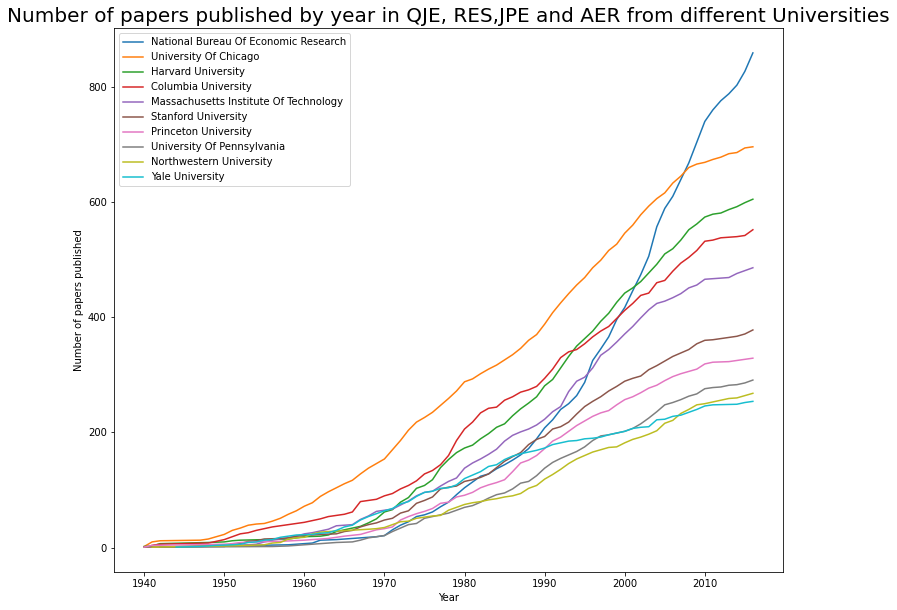

In [222]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = melted_master_condenced
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
#plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in QJE, RES,JPE and AER from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()

In [213]:
melted_master_condenced = melted_master_condenced.sort_values(by=['year'])
melted_master_condenced['aff_cum_counts'] = melted_master_condenced.groupby(['Affiliation']).cumcount()+1

highest_vals = melted_master_condenced.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

Highest_10_df = melted_master_condenced.loc[melted_master_condenced['Affiliation'].isin([highest_vals_10.iat[0,2],highest_vals_10.iat[1,2], highest_vals_10.iat[2,2],highest_vals_10.iat[3,2],highest_vals_10.iat[4,2],highest_vals_10.iat[5,2],highest_vals_10.iat[6,2],highest_vals_10.iat[7,2],highest_vals_10.iat[8,2],highest_vals_10.iat[9,2]])]
Highest_10_df = Highest_10_df.sort_values(by=['year'])
print(Highest_10_df.shape)
print(Highest_10_df.tail())
Highest_10_df['aff_cum_counts_yearly'] = Highest_10_df.groupby(['Affiliation','year']).cumcount()+1
#Highest_10_df.drop_duplicates(subset = ['Affilitation'], keep = 'last', inplace= True)
print(Highest_10_df.shape)
print(Highest_10_df.tail())

(4718, 5)
      Article_ID Aff number                           Affiliation  year  \
7143    26549859       aff8  National Bureau Of Economic Research  2016   
7135    26549900       aff2            University Of Pennsylvania  2016   
7134    26549917       aff2  National Bureau Of Economic Research  2016   
7154    26549912       aff4  National Bureau Of Economic Research  2016   
7244    26549911       aff1                       Yale University  2016   

      aff_cum_counts  
7143             838  
7135             287  
7134             837  
7154             840  
7244             254  
(4718, 6)
      Article_ID Aff number                           Affiliation  year  \
7143    26549859       aff8  National Bureau Of Economic Research  2016   
7135    26549900       aff2            University Of Pennsylvania  2016   
7134    26549917       aff2  National Bureau Of Economic Research  2016   
7154    26549912       aff4  National Bureau Of Economic Research  2016   
7244    26549911

In [214]:
melted_master_condenced = melted_master_condenced.sort_values(by=['year'])
melted_master_condenced['aff_cum_counts'] = melted_master_condenced.groupby(['Affiliation']).cumcount()+1

highest_vals = melted_master_condenced.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

a = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[0,2]]
a['aff_cum_counts_yearly'] = a.groupby(['year']).cumcount()+1
a = a.drop_duplicates(subset = ['year'], keep = 'last')
print(a.head())
print(a.shape)


     Article_ID Aff number                           Affiliation  year  \
85      1824645       aff1  National Bureau Of Economic Research  1942   
211     1826226       aff1  National Bureau Of Economic Research  1947   
71      2296220       aff2  National Bureau Of Economic Research  1954   
815     1826950       aff1  National Bureau Of Economic Research  1958   
865     1825160       aff3  National Bureau Of Economic Research  1959   

     aff_cum_counts  aff_cum_counts_yearly  
85                1                      1  
211               3                      2  
71                4                      1  
815               5                      1  
865               6                      1  
(58, 6)


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_80329/2020417594.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['aff_cum_counts_yearly'] = a.groupby(['year']).cumcount()+1


In [215]:
yearly_index = []
for i in range(1940,2011):
    yearly_index.append(i)

#print(list)
a = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[0,2]]
a['aff_cum_counts_yearly'] = a.groupby(['year']).cumcount()+1
a = a.drop_duplicates(subset = ['year'], keep = 'last')
print(a.shape)
#print(a)
a.set_index('year', inplace= True)
a = a.reindex(yearly_index, fill_value=0)
a['Affiliation'] = highest_vals_10.iat[0,2]
print(a.shape)

b = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[1,2]]
b['aff_cum_counts_yearly'] = b.groupby(['year']).cumcount()+1
b = b.drop_duplicates(subset = ['year'], keep = 'last')
print(b.shape)
#print(b)
b.set_index('year', inplace= True)
b = b.reindex(yearly_index, fill_value=0)
b['Affiliation'] = highest_vals_10.iat[1,2]
print(b.shape)

c = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[2,2]]
c['aff_cum_counts_yearly'] = c.groupby(['year']).cumcount()+1
c = c.drop_duplicates(subset = ['year'], keep = 'last')
print(c.shape)
#print(c)
c.set_index('year', inplace= True)
c = c.reindex(yearly_index, fill_value=0)
c['Affiliation'] = highest_vals_10.iat[2,2]
print(c.shape)

d = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[3,2]]
d['aff_cum_counts_yearly'] = d.groupby(['year']).cumcount()+1
d = d.drop_duplicates(subset = ['year'], keep = 'last')
print(d.shape)
#print(c)
d.set_index('year', inplace= True)
d = d.reindex(yearly_index, fill_value=0)
d['Affiliation'] = highest_vals_10.iat[3,2]
print(d.shape)

e = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[4,2]]
e['aff_cum_counts_yearly'] = e.groupby(['year']).cumcount()+1
e = e.drop_duplicates(subset = ['year'], keep = 'last')
print(e.shape)
#print(c)
e.set_index('year', inplace= True)
e = e.reindex(yearly_index, fill_value=0)
e['Affiliation'] = highest_vals_10.iat[4,2]
print(e.shape)

#6
f = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[5,2]]
f['aff_cum_counts_yearly'] = f.groupby(['year']).cumcount()+1
f = f.drop_duplicates(subset = ['year'], keep = 'last')
print(f.shape)
#print(c)
f.set_index('year', inplace= True)
f = f.reindex(yearly_index, fill_value=0)
f['Affiliation'] = highest_vals_10.iat[5,2]
print(f.shape)

#7
g = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[6,2]]
g['aff_cum_counts_yearly'] = g.groupby(['year']).cumcount()+1
g = g.drop_duplicates(subset = ['year'], keep = 'last')
print(g.shape)
#print(c)
g.set_index('year', inplace= True)
g = g.reindex(yearly_index, fill_value=0)
g['Affiliation'] = highest_vals_10.iat[6,2]
print(g.shape)

#8
h = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[7,2]]
h['aff_cum_counts_yearly'] = h.groupby(['year']).cumcount()+1
h = h.drop_duplicates(subset = ['year'], keep = 'last')
print(h.shape)
h.set_index('year', inplace= True)
h = h.reindex(yearly_index, fill_value=0)
h['Affiliation'] = highest_vals_10.iat[7,2]
print(h.shape)

#9
i = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[8,2]]
i['aff_cum_counts_yearly'] = i.groupby(['year']).cumcount()+1
i = i.drop_duplicates(subset = ['year'], keep = 'last')
print(i.shape)
i.set_index('year', inplace= True)
i = i.reindex(yearly_index, fill_value=0)
i['Affiliation'] = highest_vals_10.iat[8,2]
print(i.shape)

#10
j = melted_master_condenced.loc[melted_master_condenced['Affiliation'] == highest_vals_10.iat[9,2]]
j['aff_cum_counts_yearly'] = j.groupby(['year']).cumcount()+1
j = j.drop_duplicates(subset = ['year'], keep = 'last')
print(j.shape)
j.set_index('year', inplace= True)
j = j.reindex(yearly_index, fill_value=0)
j['Affiliation'] = highest_vals_10.iat[9,2]
print(j.shape)

(58, 6)
(71, 5)
(72, 6)
(71, 5)
(64, 6)
(71, 5)
(66, 6)
(71, 5)
(67, 6)
(71, 5)
(65, 6)
(71, 5)
(61, 6)
(71, 5)
(57, 6)
(71, 5)
(61, 6)
(71, 5)
(67, 6)
(71, 5)


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_80329/850510816.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['aff_cum_counts_yearly'] = a.groupby(['year']).cumcount()+1
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_80329/850510816.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['aff_cum_counts_yearly'] = b.groupby(['year']).cumcount()+1
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_80329/850510816.py:27: SettingWithCopyWarning: 
A value is trying to be se

In [216]:
ranked = pd.concat([a,b,c,d,e,f,g,h,i,j], axis=0)
ranked = ranked.sort_values(by=['year','Affiliation'])
print(ranked.shape)



ranked['Rank'] = ranked.groupby(['year'])['aff_cum_counts_yearly'].rank(method = 'max', ascending= False)
print(ranked.shape)
print(ranked.tail(20))
ranked.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/Working files/ranked.xlsx') 

(710, 5)
(710, 6)
      Article_ID Aff number                            Affiliation  \
year                                                                 
2009      648432       aff3                    Columbia University   
2009    20185082       aff3                     Harvard University   
2009      599707       aff2  Massachusetts Institute Of Technology   
2009      599761       aff6   National Bureau Of Economic Research   
2009      649801       aff2                Northwestern University   
2009    20185093       aff1                   Princeton University   
2009      599761       aff4                    Stanford University   
2009      597301       aff2                  University Of Chicago   
2009    40247619       aff2             University Of Pennsylvania   
2009    40247639       aff1                        Yale University   
2010    40835861       aff2                    Columbia University   
2010    40961010       aff1                     Harvard University   
20

In [217]:
ranked = pd.concat([a,b,c,d,e,f,g,h,i,j], axis=0)
ranked = ranked.sort_values(by=['year','Affiliation']).reset_index()
ranked = ranked[['year','Affiliation','aff_cum_counts_yearly']]
###print(ranked.shape)
#print(ranked.tail())
ranked['year'] = pd.to_datetime(ranked['year'],format = '%Y')
#ranked.set_index('year', inplace= True)
#print(ranked.shape)

new_rank = ranked.groupby(['Affiliation',pd.Grouper(key = 'year', freq = '10Y')]).sum().reset_index()
#print(new_rank.dtypes)
new_rank['year'] = new_rank['year'].dt.year

new_rank['Rank'] = new_rank.groupby(['year'])['aff_cum_counts_yearly'].rank(method = 'max', ascending= False)
new_rank = new_rank.sort_values(by=['year','Affiliation'])
print(new_rank.shape)
print(new_rank.tail(20))
new_rank.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/Working files/new_rank.xlsx') 

(80, 4)
                              Affiliation  year  aff_cum_counts_yearly  Rank
6                     Columbia University  2000                    118   5.0
14                     Harvard University  2000                    161   2.0
22  Massachusetts Institute Of Technology  2000                    148   4.0
30   National Bureau Of Economic Research  2000                    209   1.0
38                Northwestern University  2000                     63   9.0
46                   Princeton University  2000                     85   7.0
54                    Stanford University  2000                     96   6.0
62                  University Of Chicago  2000                    158   3.0
70             University Of Pennsylvania  2000                     64   8.0
78                        Yale University  2000                     29  10.0
7                     Columbia University  2010                    120   4.0
15                     Harvard University  2010                    1

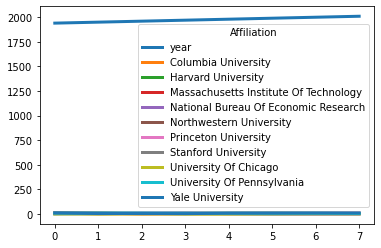

In [218]:
table = pd.pivot_table(new_rank, values = 'Rank',index = 'year', columns = 'Affiliation').reset_index()
chart = table.plot( kind='line', linewidth=3.0)


In [219]:
table.index

RangeIndex(start=0, stop=8, step=1)

In [220]:
pd.pivot_table(new_rank, values = 'Rank',index = 'Affiliation', columns = 'year')

year,1940,1950,1960,1970,1980,1990,2000,2010
Affiliation,,,,,,,,
Columbia University,10.0,2.0,2.0,2.0,2.0,4.0,5.0,4.0
Harvard University,2.0,3.0,7.0,3.0,3.0,1.0,2.0,2.0
Massachusetts Institute Of Technology,10.0,8.0,3.0,5.0,5.0,5.0,4.0,5.0
National Bureau Of Economic Research,10.0,8.0,10.0,10.0,4.0,2.0,1.0,1.0
Northwestern University,10.0,8.0,6.0,8.0,10.0,10.0,9.0,8.0
Princeton University,4.0,4.0,8.0,7.0,7.0,6.0,7.0,9.0
Stanford University,4.0,10.0,5.0,6.0,6.0,7.0,6.0,7.0
University Of Chicago,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0
University Of Pennsylvania,10.0,10.0,10.0,9.0,9.0,8.0,8.0,6.0


In [221]:
pd.pivot_table(new_rank, values = 'Rank',index = 'year', columns = 'Affiliation').reset_index()

Affiliation,year,Columbia University,Harvard University,Massachusetts Institute Of Technology,National Bureau Of Economic Research,Northwestern University,Princeton University,Stanford University,University Of Chicago,University Of Pennsylvania,Yale University
0,1940,10.0,2.0,10.0,10.0,10.0,4.0,4.0,2.0,10.0,10.0
1,1950,2.0,3.0,8.0,8.0,8.0,4.0,10.0,1.0,10.0,5.0
2,1960,2.0,7.0,3.0,10.0,6.0,8.0,5.0,1.0,10.0,5.0
3,1970,2.0,3.0,5.0,10.0,8.0,7.0,6.0,1.0,9.0,4.0
4,1980,2.0,3.0,5.0,4.0,10.0,7.0,6.0,1.0,9.0,8.0
5,1990,4.0,1.0,5.0,2.0,10.0,6.0,7.0,3.0,8.0,9.0
6,2000,5.0,2.0,4.0,1.0,9.0,7.0,6.0,3.0,8.0,10.0
7,2010,4.0,2.0,5.0,1.0,8.0,9.0,7.0,3.0,6.0,10.0
